In [38]:
import numpy as np
import pandas as pd
def load(csv_path):
    return pd.read_csv(csv_path)

In [39]:
#load dataframe
df = load('20343.csv')
df

,Cell HMS LINCS ID,Cell Name,Small Molecule HMS LINCS ID,Small Molecule Name,Small Mol Concentration (uM),Primary Target,Pathway,Mean Normalized Growth Rate Inhibition Value,Increased Fraction Dead
0,50211-2,HCC1806,10390-103-1,Abemaciclib,0.001000,CDK4/6,Cell cycle,0.9779,0.00362
1,50211-2,HCC1806,10390-103-1,Abemaciclib,0.003162,CDK4/6,Cell cycle,0.9667,-0.00301
2,50211-2,HCC1806,10390-103-1,Abemaciclib,0.010000,CDK4/6,Cell cycle,0.9168,0.00484
3,50211-2,HCC1806,10390-103-1,Abemaciclib,0.031623,CDK4/6,Cell cycle,0.7658,0.01650
4,50211-2,HCC1806,10390-103-1,Abemaciclib,0.100000,CDK4/6,Cell cycle,0.7132,0.01025
...,...,...,...,...,...,...,...,...,...
10705,51083-2,SUM159PT,10194-106-1,Cabozantinib,0.100000,VEGFR2/MET,RTK,1.0115,-0.00152
10706,51083-2,SUM159PT,10194-106-1,Cabozantinib,0.316230,VEGFR2/MET,RTK,0.9965,0.00568
10707,51083-2,SUM159PT,10194-106-1,Cabozantinib,1.000000,VEGFR2/MET,RTK,0.9307,0.03130
10708,51083-2,SUM159PT,10194-106-1,Cabozantinib,3.162300,VEGFR2/MET,RTK,0.7480,0.08743


In [40]:
#find the # of unique cells and molecules
cells = df['Cell HMS LINCS ID'].unique()
moles = df['Small Molecule HMS LINCS ID'].unique()
n_cell = len(cells)
n_mole = len(moles)
n_exp = n_cell * n_mole

In [41]:
#find unique values of concentration
concs = df['Small Mol Concentration (uM)'].unique()

In [42]:
#redefine the problem space for retrospective active learning
#find the values of concentration that all possible combinations of cell and molecular are performed
df_concs = []
new_concs = []
for i in range(len(concs)):
    df_conc = df[df['Small Mol Concentration (uM)'] == concs[i]]
    if len(df_conc) == n_exp:
        df_concs.append(df_conc)
        new_concs.append(concs[i])
concs = new_concs
n_conc = len(concs)
n_exp = n_cell * n_mole * n_conc
df = df[df['Small Mol Concentration (uM)'].isin(concs)]

In [43]:
df_concs[0]

,Cell HMS LINCS ID,Cell Name,Small Molecule HMS LINCS ID,Small Molecule Name,Small Mol Concentration (uM),Primary Target,Pathway,Mean Normalized Growth Rate Inhibition Value,Increased Fraction Dead
2,50211-2,HCC1806,10390-103-1,Abemaciclib,0.01,CDK4/6,Cell cycle,0.9168,0.00484
12,50211-2,HCC1806,10071-101-1,Palbociclib,0.01,CDK4/6,Cell cycle,0.9497,0.00431
20,50211-2,HCC1806,10006-101-1,AZD7762,0.01,CHK1/2,Cell cycle,0.7268,0.06774
31,50211-2,HCC1806,10387-101-1,Volasertib,0.01,PLK,Cell cycle,-0.1860,0.51709
40,50211-2,HCC1806,10287-101-2,Dinaciclib,0.01,pan CDK,Cell cycle,0.7679,0.03547
...,...,...,...,...,...,...,...,...,...
10667,51083-2,SUM159PT,10394-101-1,Ceritinib,0.01,ALK,RTK,1.0080,-0.00023
10677,51083-2,SUM159PT,10018-101-1,Neratinib,0.01,EGFR/HER2,RTK,0.9898,-0.00141
10685,51083-2,SUM159PT,10131-101-1,Tivantinib,0.01,MET,RTK,1.0165,0.00077
10694,51083-2,SUM159PT,10444-101-1,Cediranib,0.01,VEGFR/cKIT,RTK,1.0195,0.00135


In [44]:
df

,Cell HMS LINCS ID,Cell Name,Small Molecule HMS LINCS ID,Small Molecule Name,Small Mol Concentration (uM),Primary Target,Pathway,Mean Normalized Growth Rate Inhibition Value,Increased Fraction Dead
2,50211-2,HCC1806,10390-103-1,Abemaciclib,0.01000,CDK4/6,Cell cycle,0.9168,0.00484
4,50211-2,HCC1806,10390-103-1,Abemaciclib,0.10000,CDK4/6,Cell cycle,0.7132,0.01025
5,50211-2,HCC1806,10390-103-1,Abemaciclib,0.31623,CDK4/6,Cell cycle,0.6567,0.01780
6,50211-2,HCC1806,10390-103-1,Abemaciclib,1.00000,CDK4/6,Cell cycle,0.4501,0.04250
12,50211-2,HCC1806,10071-101-1,Palbociclib,0.01000,CDK4/6,Cell cycle,0.9497,0.00431
...,...,...,...,...,...,...,...,...,...
10698,51083-2,SUM159PT,10444-101-1,Cediranib,1.00000,VEGFR/cKIT,RTK,0.9847,-0.00209
10703,51083-2,SUM159PT,10194-106-1,Cabozantinib,0.01000,VEGFR2/MET,RTK,1.0155,0.00176
10705,51083-2,SUM159PT,10194-106-1,Cabozantinib,0.10000,VEGFR2/MET,RTK,1.0115,-0.00152
10706,51083-2,SUM159PT,10194-106-1,Cabozantinib,0.31623,VEGFR2/MET,RTK,0.9965,0.00568


In [45]:
user_item_grs = []
user_item_ifds = []
for i in range(n_conc):
    gr = df_concs[i]['Mean Normalized Growth Rate Inhibition Value'].values
    ifd = df_concs[i]['Increased Fraction Dead'].values
    user_item_gr = np.zeros([n_cell, n_mole])
    user_item_ifd = np.zeros([n_cell, n_mole])
    for j in range(n_cell):
        user_item_gr[j] = gr[j * n_mole : (j + 1) * n_mole]
        user_item_ifd[j] = ifd[j * n_mole : (j + 1) * n_mole]
    user_item_grs.append(user_item_gr - 1)
    user_item_ifds.append(user_item_ifd)

In [46]:
#Alternating Least Square + Deep Learning
import matplotlib.pyplot as plt
from keras import backend
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout

class ALSDL:
    def __init__(self, user_items, n_e, train_indexes, alpha, l_r, beta):
        self.user_items = user_items
        self.n_e = n_e
        self.n_als = len(self.user_items)
        self.n_user, self.n_item = self.user_items[0].shape
        self.n_exp = self.n_als * self.n_user * self.n_item
        self.set_train_indexes(train_indexes)
        self.alpha = alpha
        self.l_r = l_r
        self.beta = beta
        self.model_init()
        
    def als_clear(self):
        self.user_embeddings = np.random.uniform(-1, 1, (self.n_als, self.n_user, self.n_e))
        self.item_embeddings = np.random.uniform(-1, 1, (self.n_als, self.n_item, self.n_e))
        
    def set_train_indexes(self, train_indexes):
        self.als_clear()
        self.train_indexes = train_indexes
        self.train_user_items = np.multiply(self.user_items, self.train_indexes)
        self.n_train = np.sum(self.train_indexes).astype(np.int_)
        self.model_init()
        
    def myloss(self, y_true, y_pred):
        return backend.mean(backend.square(y_pred - y_true), axis=-1) / 2 - self.beta * backend.mean(backend.sign(y_pred * y_true), axis=-1)
    
    def rmse(self, y_true, y_pred):
        return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
    
    def model_init(self):
        self.model = Sequential()
        self.model.add(Dense(self.n_e * 4, input_shape=(self.n_e * 2,)))
        self.model.add(Activation('tanh'))
        self.model.add(Dense(self.n_e * 2))
        self.model.add(Activation('tanh'))
        self.model.add(Dense(self.n_e))
        self.model.add(Activation('tanh'))
        self.model.add(Dense(1))
        self.model.compile(loss=self.myloss, optimizer='rmsprop', metrics=[self.rmse])
    
    def y_test_predict(self):
        self.y_test_pred = self.model.predict(self.x_test).flatten()
    
    def test_loss(self):
        loss, rmse = self.model.evaluate(self.x_test, self.y_test, verbose=0)
        return rmse
    
    def test_acc(self):
        y_test_true_pred = np.where(((self.y_test>0)&(self.y_test_pred>0))|((self.y_test<0)&(self.y_test_pred<0))|((self.y_test==0)&(self.y_test_pred==0)), 1, 0)
        test_acc = np.sum(y_test_true_pred) / self.n_exp
        return test_acc
    
    def unseen_predict_als(self):
        seen_indexes = []
        unseen_indexes = []
        unseen_pred = []
        indexes = np.where(self.train_indexes == 1)
        for i in range(len(indexes[0])):
            seen_indexes.append(indexes[0][i] * self.n_user * self.n_item + indexes[1][i] * self.n_item + indexes[2][i])
        for i, element in enumerate(self.alses_predict()):
            if i not in seen_indexes:
                unseen_indexes.append(i)
                unseen_pred.append(element)
        return unseen_indexes, unseen_pred
    
    def unseen_predict(self):
        seen_indexes = []
        unseen_indexes = []
        unseen_pred = []
        indexes = np.where(self.train_indexes == 1)
        for i in range(len(indexes[0])):
            seen_indexes.append(indexes[0][i] * self.n_user * self.n_item + indexes[1][i] * self.n_item + indexes[2][i])
        for i, element in enumerate(self.y_test_pred):
            if i not in seen_indexes:
                unseen_indexes.append(i)
                unseen_pred.append(element)
        return unseen_indexes, unseen_pred
    
    def user_items_predict(self):
        test_smpl_n = 0
        user_items_pred = []
        for i in range(self.n_als):
            user_item_pred = np.zeros([self.n_user, self.n_item])
            for j in range(self.n_user):
                for k in range(self.n_item):
                    user_item_pred[j, k] = self.y_test_pred[test_smpl_n]
        return user_items_pred
    
    def alses_predict(self):
        alses_pred = np.zeros_like(self.y_test)
        for i in range(self.n_als):
            alses_pred[i * self.n_user * self.n_item : (i + 1) * self.n_user * self.n_item] = self.als_predict(i).flatten()
        return alses_pred    
        
    def als_predict(self, als_index):
        return np.dot(self.user_embeddings[als_index], self.item_embeddings[als_index].T)
    
    def als_train_losses(self):
        train_losses = []
        for i in range(self.n_als):
            train_losses.append(self.als_train_loss(i))
        return train_losses
    
    def als_train_loss(self, als_index):
        user_item_pred = self.als_predict(als_index)
        train_loss = np.sum(np.square(np.multiply(user_item_pred, self.train_indexes[als_index]) - self.train_user_items[als_index]))
        return train_loss

    def als_train(self, n_epoch_als):
        for i in range(n_epoch_als):
            for j in range(self.n_als):
                ui_pred = np.multiply(self.train_indexes[j], self.als_predict(j))
                error = ui_pred - self.train_user_items[j]
                if i % 2 == 0:
                    user_grads = np.dot(error, self.item_embeddings[j])
                    self.user_embeddings[j] = self.alpha * self.user_embeddings[j] - self.l_r * user_grads
                else:
                    item_grads = np.dot(error.T, self.user_embeddings[j])
                    self.item_embeddings[j] = self.alpha * self.item_embeddings[j] - self.l_r * item_grads
                    
    def get_train_data(self):
        self.x_train = np.zeros([self.n_train, 2*self.n_e])
        self.y_train = np.zeros(self.n_train)
        train_smpl_n = 0
        for i in range(self.n_als):
            train_cords = np.where(self.train_indexes[i] == 1)
            for j in range(len(train_cords[0])):
                user_cord = train_cords[0][j]
                item_cord = train_cords[1][j]
                self.x_train[train_smpl_n, : self.n_e] = self.user_embeddings[i, user_cord]
                self.x_train[train_smpl_n, self.n_e :] = self.item_embeddings[i, item_cord]
                self.y_train[train_smpl_n] = self.user_items[i][user_cord, item_cord]
                train_smpl_n = train_smpl_n + 1
                
    def get_test_data(self):
        self.x_test = np.zeros([self.n_exp, 2*self.n_e])
        self.y_test = np.zeros(self.n_exp)
        test_smpl_n = 0
        for i in range(self.n_als):
            for j in range(self.n_user):
                for k in range(self.n_item):
                    self.x_test[test_smpl_n, : self.n_e] = self.user_embeddings[i, j]
                    self.x_test[test_smpl_n, self.n_e :] = self.item_embeddings[i, k]
                    self.y_test[test_smpl_n] = self.user_items[i][j, k]
                    test_smpl_n = test_smpl_n + 1
                
    def train(self, n_epoch_als, n_epoch_dl):
        self.als_train(n_epoch_als)
        self.get_train_data()
        batch_size=len(self.y_train) // 10
        if batch_size == 0:
            batch_size = 1
        self.model.fit(self.x_train, self.y_train, batch_size=batch_size, shuffle=True, epochs=n_epoch_dl, verbose=0)
        self.get_test_data()
        self.y_test_predict()

In [47]:
def init_train_indexes(n_op, n_user, n_item, n_exp, n_train):
    indexes = np.arange(0, n_exp, 1)
    np.random.shuffle(indexes)
    indexes = indexes[: n_train]
    train_indexes = np.zeros([n_op, n_user, n_item])
    for i in indexes:
        train_indexes[i // (n_user * n_item), (i % (n_user * n_item)) // n_item, (i % (n_user * n_item)) % n_item] = 1
    return train_indexes

In [48]:
class ALS:
    def __init__(self, user_item, n_e, train_index, alpha, l_r):
        self.user_item = user_item
        self.n_e = n_e
        self.n_user, self.n_item = self.user_item.shape
        self.user_embedding = np.random.uniform(-1, 1, (self.n_user, self.n_e))
        self.item_embedding = np.random.uniform(-1, 1, (self.n_item, self.n_e))
        self.train_index = train_index
        self.n_train = np.sum(self.train_index).astype(np.int_)
        self.alpha = alpha
        self.l_r = l_r
        self.train_user_item = np.multiply(self.user_item, self.train_index)
        
    def predict(self):
        return np.dot(self.user_embedding, self.item_embedding.T)
    
    def train_loss(self):
        self.user_item_pred = self.predict()
        train_loss = np.sum(np.square(np.multiple(self.user_item_pred, self.train_index) - self.train_user_item))
        return train_loss
    
    def test_loss(self):
        self.user_item_pred = self.predict()
        train_loss = np.sum(np.square(self.user_item_pred - self.user_item))
        return train_loss

    def train(self, n_epoch):
        for i in range(n_epoch):
            ui_pred = np.multiply(self.train_index, self.predict())
            error = ui_pred - self.train_user_item
            if i % 2 == 0:
                user_grads = np.dot(error, self.item_embedding)
                self.user_embedding = self.alpha * self.user_embedding - self.l_r * user_grads
            else:
                item_grads = np.dot(error.T, self.user_embedding)
                self.item_embedding = self.alpha * self.item_embedding - self.l_r * item_grads

In [49]:
def eer_get_train_indexes(user_items, train_indexes, unseen_indexes, unseen_pred, query_size, n_user, n_item, n_e, alpha, l_r, n_als_epoch):
    eer_pred = []
    n_user_items = user_items.copy()
    for i, index in enumerate(unseen_indexes):
        n_user_items[index // (n_user * n_item)][(index % (n_user * n_item)) // n_item, (index % (n_user * n_item)) % n_item] = unseen_pred[i]
    als_test_losses = []
    for i in range(len(user_items)):
        als = ALS(n_user_items[i], n_e, train_indexes[i], alpha, l_r)
        als.train(n_als_epoch)
        als_test_losses.append(als.test_loss())
    for i, index in enumerate(unseen_indexes):
        train_index = train_indexes[index // (n_user * n_item)].copy()
        user_item = n_user_items[index // (n_user * n_item)]
        train_index[(index % (n_user * n_item)) // n_item, (index % (n_user * n_item)) % n_item] = 1
        als = ALS(user_item, n_e, train_index, alpha, l_r)
        als.train(n_als_epoch)
        eer_pred.append(als.test_loss() - als_test_losses[index // (n_user * n_item)])
    top_indexes = np.argsort(eer_pred)[: query_size]
    for i in range(len(top_indexes)):
        index = unseen_indexes[top_indexes[i]]
        train_indexes[index // (n_user * n_item), (index % (n_user * n_item)) // n_item, (index % (n_user * n_item)) % n_item] = 1

In [50]:
def random_get_train_indexes(train_indexes, unseen_indexes, query_size, n_user, n_item):
    np.random.shuffle(unseen_indexes)
    top_indexes = unseen_indexes[: query_size]
    for index in top_indexes:
        train_indexes[index // (n_user * n_item), (index % (n_user * n_item)) // n_item, (index % (n_user * n_item)) % n_item] = 1

In [51]:
def eer_sampling(user_items, alsdl, n_init_train, train_indexes, max_query, query_size, n_user, n_item, n_exp, n_als_epoch, n_dl_epoch, n_e, alpha, l_r):
    n_train = n_init_train
    hist = [[] for i in range(2)]
    hist[0].append(alsdl.test_loss())
    hist[1].append(alsdl.test_acc())
    print('query: %d, sampled: %d, percentage: %f, loss: %f, acc: %f' % (0, n_train, n_train / n_exp, hist[0][0], hist[1][0]))
    for i in range(max_query):
        unseen_indexes, unseen_pred = alsdl.unseen_predict()
        eer_get_train_indexes(user_items, train_indexes, unseen_indexes, unseen_pred, query_size, n_user, n_item, n_e, alpha, l_r, n_als_epoch)
        alsdl.set_train_indexes(train_indexes)
        alsdl.train(n_als_epoch, n_dl_epoch)
        loss = alsdl.test_loss()
        acc = alsdl.test_acc()
        hist[0].append(loss)
        hist[1].append(acc)
        n_train = n_train + query_size
        print('query: %d, sampled: %d, percentage: %f, loss: %f, acc: %f' % (i + 1, n_train, n_train / n_exp, loss, acc))
    return hist

In [52]:
def random_sampling(alsdl, n_init_train, train_indexes, max_query, query_size, n_user, n_item, n_exp, n_als_epoch, n_dl_epoch):
    n_train = n_init_train
    hist = [[] for i in range(2)]
    hist[0].append(alsdl.test_loss())
    hist[1].append(alsdl.test_acc())
    print('query: %d, sampled: %d, percentage: %f, loss: %f, acc: %f' % (0, n_train, n_train / n_exp, hist[0][0], hist[1][0]))
    for i in range(max_query):
        unseen_indexes, unseen_pred = alsdl.unseen_predict()
        random_get_train_indexes(train_indexes, unseen_indexes, query_size, n_user, n_item)
        alsdl.set_train_indexes(train_indexes)
        alsdl.train(n_als_epoch, n_dl_epoch)
        loss = alsdl.test_loss()
        acc = alsdl.test_acc()
        hist[0].append(loss)
        hist[1].append(acc)
        n_train = n_train + query_size
        print('query: %d, sampled: %d, percentage: %f, loss: %f, acc: %f' % (i + 1, n_train, n_train / n_exp, loss, acc))
    return hist

In [53]:
def plot(hist_al, hist_nal):
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(hist_nal[0], color='blue', label='random_sampling')
    plt.plot(hist_al[0], color='red', label='elm_sampling')
    plt.xlabel('# of queries')
    plt.ylabel('rmse')
    plt.legend()
    plt.subplot(2,1,2)
    plt.plot(hist_nal[1], color='blue', label='random_sampling')
    plt.plot(hist_al[1], color='red', label='elm_sampling')
    plt.xlabel('# of queries')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

random sampling:
query: 0, sampled: 40, percentage: 0.008403, loss: 0.225536, acc: 0.707773
query: 1, sampled: 80, percentage: 0.016807, loss: 0.214055, acc: 0.645168
query: 2, sampled: 120, percentage: 0.025210, loss: 0.192256, acc: 0.700630
query: 3, sampled: 160, percentage: 0.033613, loss: 0.188439, acc: 0.673950
query: 4, sampled: 200, percentage: 0.042017, loss: 0.201823, acc: 0.704832
query: 5, sampled: 240, percentage: 0.050420, loss: 0.194922, acc: 0.658403
query: 6, sampled: 280, percentage: 0.058824, loss: 0.181676, acc: 0.690966
query: 7, sampled: 320, percentage: 0.067227, loss: 0.177138, acc: 0.734664
query: 8, sampled: 360, percentage: 0.075630, loss: 0.166146, acc: 0.702731
query: 9, sampled: 400, percentage: 0.084034, loss: 0.184216, acc: 0.656933
query: 10, sampled: 440, percentage: 0.092437, loss: 0.168382, acc: 0.687605
query: 11, sampled: 480, percentage: 0.100840, loss: 0.167652, acc: 0.700420
query: 12, sampled: 520, percentage: 0.109244, loss: 0.162368, acc: 0.7

query: 106, sampled: 4280, percentage: 0.899160, loss: 0.117989, acc: 0.810924
query: 107, sampled: 4320, percentage: 0.907563, loss: 0.116892, acc: 0.807563
query: 108, sampled: 4360, percentage: 0.915966, loss: 0.119596, acc: 0.804832
query: 109, sampled: 4400, percentage: 0.924370, loss: 0.118134, acc: 0.804202
query: 110, sampled: 4440, percentage: 0.932773, loss: 0.117862, acc: 0.810084
query: 111, sampled: 4480, percentage: 0.941176, loss: 0.113391, acc: 0.809034
query: 112, sampled: 4520, percentage: 0.949580, loss: 0.116105, acc: 0.800420
query: 113, sampled: 4560, percentage: 0.957983, loss: 0.117293, acc: 0.814706
query: 114, sampled: 4600, percentage: 0.966387, loss: 0.115633, acc: 0.809874
query: 115, sampled: 4640, percentage: 0.974790, loss: 0.117428, acc: 0.810294
query: 116, sampled: 4680, percentage: 0.983193, loss: 0.115613, acc: 0.813235
query: 117, sampled: 4720, percentage: 0.991597, loss: 0.114399, acc: 0.816807
query: 118, sampled: 4760, percentage: 1.000000, los

query: 93, sampled: 3760, percentage: 0.789916, loss: 0.047177, acc: 0.922059
query: 94, sampled: 3800, percentage: 0.798319, loss: 0.045043, acc: 0.925840
query: 95, sampled: 3840, percentage: 0.806723, loss: 0.043976, acc: 0.924580
query: 96, sampled: 3880, percentage: 0.815126, loss: 0.044592, acc: 0.923529
query: 97, sampled: 3920, percentage: 0.823529, loss: 0.044990, acc: 0.925000
query: 98, sampled: 3960, percentage: 0.831933, loss: 0.045143, acc: 0.925420
query: 99, sampled: 4000, percentage: 0.840336, loss: 0.044989, acc: 0.925000
query: 100, sampled: 4040, percentage: 0.848739, loss: 0.044557, acc: 0.925420
query: 101, sampled: 4080, percentage: 0.857143, loss: 0.045795, acc: 0.925000
query: 102, sampled: 4120, percentage: 0.865546, loss: 0.044649, acc: 0.923739
query: 103, sampled: 4160, percentage: 0.873950, loss: 0.044741, acc: 0.925210
query: 104, sampled: 4200, percentage: 0.882353, loss: 0.045064, acc: 0.925000
query: 105, sampled: 4240, percentage: 0.890756, loss: 0.04

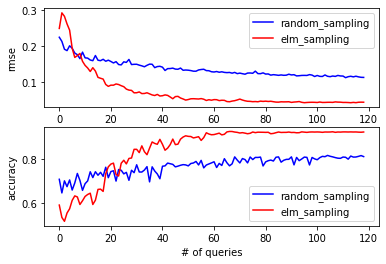

In [19]:
n_init_train = 40
n_e = 5 #intuitively defined, can be tuned automatically
alpha = 1
l_r = 0.01
beta = 0.1
n_als_epoch = 200
n_dl_epoch = 200
max_query = 118
query_size = 40

print('random sampling:')
train_indexes = init_train_indexes(n_conc, n_cell, n_mole, n_exp, n_init_train)
alsdl_rs = ALSDL(user_item_grs, n_e, train_indexes, alpha, l_r, beta)
alsdl_rs.train(n_als_epoch, n_dl_epoch)
hist_rs = random_sampling(alsdl_rs, n_init_train, train_indexes, max_query, query_size, n_cell, n_mole, n_exp, n_als_epoch, n_dl_epoch)

print('elm sampling:')
train_indexes = init_train_indexes(n_conc, n_cell, n_mole, n_exp, n_init_train)
alsdl_eer = ALSDL(user_item_grs, n_e, train_indexes, alpha, l_r, beta)
alsdl_eer.train(n_als_epoch, n_dl_epoch)
hist_eer = eer_sampling(user_item_grs, alsdl_eer, n_init_train, train_indexes, max_query, query_size, n_cell, n_mole, n_exp, n_als_epoch, n_dl_epoch, n_e, alpha, l_r)

plot(hist_eer, hist_rs)

random sampling:
query: 0, sampled: 40, percentage: 0.008403, loss: 0.195037, acc: 0.617017
query: 1, sampled: 80, percentage: 0.016807, loss: 0.184946, acc: 0.648319
query: 2, sampled: 120, percentage: 0.025210, loss: 0.166548, acc: 0.650210
query: 3, sampled: 160, percentage: 0.033613, loss: 0.154512, acc: 0.652941
query: 4, sampled: 200, percentage: 0.042017, loss: 0.148399, acc: 0.682353
query: 5, sampled: 240, percentage: 0.050420, loss: 0.143258, acc: 0.663235
query: 6, sampled: 280, percentage: 0.058824, loss: 0.134115, acc: 0.665756
query: 7, sampled: 320, percentage: 0.067227, loss: 0.138780, acc: 0.727521
query: 8, sampled: 360, percentage: 0.075630, loss: 0.124690, acc: 0.674370
query: 9, sampled: 400, percentage: 0.084034, loss: 0.123986, acc: 0.738655
query: 10, sampled: 440, percentage: 0.092437, loss: 0.128524, acc: 0.679622
query: 11, sampled: 480, percentage: 0.100840, loss: 0.135514, acc: 0.731513
query: 12, sampled: 520, percentage: 0.109244, loss: 0.114943, acc: 0.6

query: 106, sampled: 4280, percentage: 0.899160, loss: 0.057626, acc: 0.733403
query: 107, sampled: 4320, percentage: 0.907563, loss: 0.057912, acc: 0.756723
query: 108, sampled: 4360, percentage: 0.915966, loss: 0.056698, acc: 0.685714
query: 109, sampled: 4400, percentage: 0.924370, loss: 0.056611, acc: 0.706513
query: 110, sampled: 4440, percentage: 0.932773, loss: 0.056498, acc: 0.739916
query: 111, sampled: 4480, percentage: 0.941176, loss: 0.058409, acc: 0.777311
query: 112, sampled: 4520, percentage: 0.949580, loss: 0.062499, acc: 0.763025
query: 113, sampled: 4560, percentage: 0.957983, loss: 0.055887, acc: 0.746849
query: 114, sampled: 4600, percentage: 0.966387, loss: 0.055279, acc: 0.724160
query: 115, sampled: 4640, percentage: 0.974790, loss: 0.058931, acc: 0.774790
query: 116, sampled: 4680, percentage: 0.983193, loss: 0.054374, acc: 0.756092
query: 117, sampled: 4720, percentage: 0.991597, loss: 0.056114, acc: 0.769118
query: 118, sampled: 4760, percentage: 1.000000, los

query: 93, sampled: 3760, percentage: 0.789916, loss: 0.048878, acc: 0.910294
query: 94, sampled: 3800, percentage: 0.798319, loss: 0.048777, acc: 0.914496
query: 95, sampled: 3840, percentage: 0.806723, loss: 0.049051, acc: 0.909244
query: 96, sampled: 3880, percentage: 0.815126, loss: 0.048759, acc: 0.905252
query: 97, sampled: 3920, percentage: 0.823529, loss: 0.048876, acc: 0.904202
query: 98, sampled: 3960, percentage: 0.831933, loss: 0.048446, acc: 0.911345
query: 99, sampled: 4000, percentage: 0.840336, loss: 0.047871, acc: 0.913655
query: 100, sampled: 4040, percentage: 0.848739, loss: 0.048431, acc: 0.913866
query: 101, sampled: 4080, percentage: 0.857143, loss: 0.048010, acc: 0.914916
query: 102, sampled: 4120, percentage: 0.865546, loss: 0.048165, acc: 0.915126
query: 103, sampled: 4160, percentage: 0.873950, loss: 0.049234, acc: 0.915336
query: 104, sampled: 4200, percentage: 0.882353, loss: 0.048876, acc: 0.911555
query: 105, sampled: 4240, percentage: 0.890756, loss: 0.04

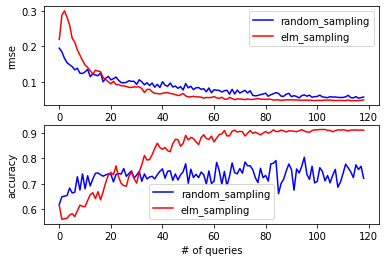

In [54]:
n_init_train = 40
n_e = 5 #intuitively defined, can be tuned automatically
alpha = 1
l_r = 0.01
beta = 0.1
n_als_epoch = 200
n_dl_epoch = 200
max_query = 118
query_size = 40

print('random sampling:')
train_indexes = init_train_indexes(n_conc, n_cell, n_mole, n_exp, n_init_train)
alsdl_rs = ALSDL(user_item_ifds, n_e, train_indexes, alpha, l_r, beta)
alsdl_rs.train(n_als_epoch, n_dl_epoch)
hist_rs = random_sampling(alsdl_rs, n_init_train, train_indexes, max_query, query_size, n_cell, n_mole, n_exp, n_als_epoch, n_dl_epoch)

print('elm sampling:')
train_indexes = init_train_indexes(n_conc, n_cell, n_mole, n_exp, n_init_train)
alsdl_eer = ALSDL(user_item_ifds, n_e, train_indexes, alpha, l_r, beta)
alsdl_eer.train(n_als_epoch, n_dl_epoch)
hist_eer = eer_sampling(user_item_ifds, alsdl_eer, n_init_train, train_indexes, max_query, query_size, n_cell, n_mole, n_exp, n_als_epoch, n_dl_epoch, n_e, alpha, l_r)

plot(hist_eer, hist_rs)